In [35]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [63]:
train = pd.read_csv('data/train.csv', chunksize = 150000) #generator
trained_dfs = []
for i in range(10):
    trained_dfs.append(next(train))

In [64]:
trained_dfs[0].head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [38]:
trained_dfs[0].shape

(150000, 2)

In [39]:
trained_dfs[1].head()

,acoustic_data,time_to_failure
150000,5,1.430797
150001,6,1.430797
150002,8,1.430797
150003,6,1.430797
150004,3,1.430797


In [59]:
train_samp = pd.DataFrame(trained_dfs[0])
earthquake=[0]
train_samp.time_to_failure.isin(earthquake) #time_to_failure does not go to 0

In [61]:
min(trained_dfs[0].time_to_failure)

1.4307971859

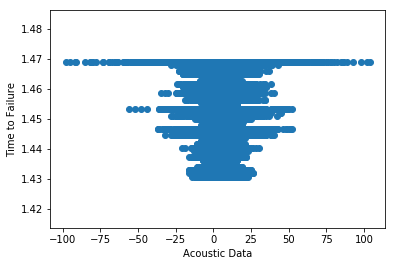

In [69]:
plt.scatter(train_samp.acoustic_data,train_samp.time_to_failure)
plt.xlabel('Acoustic Data')
plt.ylabel('Time to Failure')
plt.show()
# What patterns are observed with the data?
# Earthquake occurs when acoustic data =0
# What patterns exist with the time to failure data and acoustic data... use to predit
# Consider statistics like kurtosis, threshold, 

In [72]:
np.mean(trained_dfs[0].acoustic_data)

4.8841133333333335

In [73]:
min(trained_dfs[0].acoustic_data)

-98

In [ ]:



trained_dfs['experimental run time'] = []